# TASK 1 GIVEN BY BHARAT INTERN INTERNSHIP


 HANDWRITTEN DIGIT RECOGNITION USING MNIST DATASET BY (PRACHI GOTHWAL)

The MNIST dataset is a widely used dataset in machine learning and consists of a set of 60,000 training images and 10,000 test images of handwritten digits from 0 to 9.Every time a data scientist or machine learning engineer makes a new algorithm for classification, they would always first check its performance on the MNIST dataset.It provides a baseline for testing image processing systems.

########## FETCHING DATASET#########

In [2]:
import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import tensorflow as tf
# tensorflow is aliased as tf
from tensorflow.keras import layers

In [3]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
## checking the shapes of training and testing dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
# displayiing the data of x_train
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Preprocess the data-->
1.Reshaping the input data which is work as a input for CNN
2.The original shape of x_train is (num_train_samples, 28, 28), where num_train_samples is the number of training samples,
and 28 by 28 represents the dimensions of each image
3.CNN takes the input data with the shape,(num_samples, height, width, channels)..
4.Images are grayscale, so the channel value is set to 1
5.After reshaping the datatype of array will change to float32 which is common data type used in deep learning.

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# NORMALIZATION

The original pixel values in the MNIST dataset range from 0 to 255, where 0 represents black and 255 represents white.
Dividing the pixel values by 255 normalizes the data so that the values are scaled between 0 and 1.

In [7]:
x_train /= 340
x_test /= 340
print(x_train.dtype)
print(x_test.dtype)

float32
float32


In [8]:
x_train /= 255
x_test /= 255
print(x_train.dtype)
print(x_test.dtype)

float32
float32


In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# BUILDING OF NEURAL NETWORK

In [10]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 10)                77450     
                                                                 
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
____________________________________________________

This summary shows that the model has five layers:

Conv2D: This layer performs convolutional operations on the input. It has 32 filters of size 3x3 and applies the
ReLU activation function. The output shape is (None, 26, 26, 32), where None represents the batch size.

MaxPooling2D: This layer performs max pooling, which reduces the spatial dimensions of the input.
It uses a 2x2 pooling window. The output shape is (None, 13, 13, 32), as the pooling operation reduces each spatial
dimension by a factor of 2.

Conv2D: This layer is similar to the previous Conv2D layer but has 64 filters instead of 32.
The output shape is (None, 11, 11, 64).

Flatten: This layer flattens the previous output, converting it from a 4D tensor to a 2D tensor.
The output shape is (None, 7744), where 7744 is the result of multiplying the spatial dimensions.

Dense: This layer is a fully connected layer with 10 units and applies the ReLU activation function.
It takes the flattened input and produces an output of shape (None, 10), where 10 represents the number of classes in
the classification task.

# PLOT NEURAL NETWORK MODEL

In [12]:
#tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
#img = plt.imread('model.png')
#plt.imshow(img)
#plt.axis('off')
#plt.show()

# COMPILATION OF MODEL

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# TRAIN THE MODEL

In [14]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5995 - accuracy: 0.8122 - val_loss: 0.3090 - val_accuracy: 0.9096
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2875 - accuracy: 0.9160 - val_loss: 0.2232 - val_accuracy: 0.9356
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1940 - accuracy: 0.9444 - val_loss: 0.1495 - val_accuracy: 0.9564
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1384 - accuracy: 0.9586 - val_loss: 0.1153 - val_accuracy: 0.9663
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1124 - accuracy: 0.9671 - val_loss: 0.0962 - val_accuracy: 0.9705


# ACCURACY TEST

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0962 - accuracy: 0.9705
Test accuracy: 0.9704999923706055


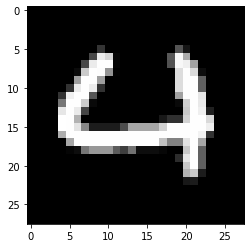

In [16]:
img = x_train[60]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

# RESULT AFTER PREDICTION

In [17]:
img= img.reshape(1, 28, 28, 1)
a= model.predict([img])
predicted_class = np.argmax(a)
print("Predicted class: {}".format(predicted_class))

1/1 [==============================] - 0s 68ms/step
Predicted class: 4
